In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date, datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set()

# Import the data and making a dataframe out of it
#file_name = '../Data/Final_data.cleaned.csv'
file_name = '../Emilio Caba/Final_data_cleaned_missing_houses.csv'
df = pd.read_csv(file_name)

# Rename the index columns
df = df.rename(columns={"ID-nummer" : "Index"})
df = df.set_index('Index')
df.index = pd.to_datetime(df.index)

# Adding the dummy variable: Hours
df['Hours'] = df.index.hour

# Adding the dummy variable: Season
Y = 2000 #Leap year to allow input for a leap day (Y-02-29)
seasons = [(1, (date(Y,  1,  1),  date(Y,  3, 20))),
           (2, (date(Y,  3, 21),  date(Y,  6, 20))),
           (3, (date(Y,  6, 21),  date(Y,  9, 22))),
           (4, (date(Y,  9, 23),  date(Y, 12, 20))),
           (1, (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

df['Season'] = df.index.to_series().apply(lambda x: get_season(x.to_pydatetime()))

# Adding the dummy variable: DayTime
def partofday(hours):
    if (hours >= 0 and hours < 6): 
        return 1
    elif(hours >= 6 and hours < 12): 
        return 2
    elif(hours >= 12 and hours < 18): 
        return 3
    else: 
        return 4   

df['Part_of_the_day'] = df['Hours'].apply(lambda x: partofday(x))

# Adding the dummy variable: Day of the week
def get_day_of_week(date):
    if isinstance(datetime, type(datetime)):
        return date.weekday() + 1
    return np.NaN

df['Day_of_the_week'] = df.index.to_series().apply(lambda x: get_day_of_week(x.to_pydatetime()))
print(df.head())
print('\n\ndataset without normalitation:')
print(df.describe())


datos_norm = (df-np.min(df))/(np.max(df)-np.min(df))

print('\n\n\nnormalized dataset:')
print(datos_norm.describe())


                     H01_prod  H02_prod  H03_prod  H04_prod  H06_prod  \
Index                                                                   
2017-09-12 00:15:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 00:30:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 00:45:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 01:00:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 01:15:00       0.0       0.0       0.0       0.0       0.0   

                     H07_prod  H08_prod  H09_prod  H11_prod  H13_prod  ...  \
Index                                                                  ...   
2017-09-12 00:15:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 00:30:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 00:45:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 01:00:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 01:15:00 

In [3]:
print(df.columns)
datos_norm

Index(['H01_prod', 'H02_prod', 'H03_prod', 'H04_prod', 'H06_prod', 'H07_prod',
       'H08_prod', 'H09_prod', 'H11_prod', 'H13_prod', 'H15_prod', 'H16_prod',
       'H17_prod', 'H18_prod', 'H19_prod', 'H20_prod', 'H21_prod', 'H22_prod',
       'H23_prod', 'H24_prod', 'H25_prod', 'H26_prod', 'H27_prod', 'H28_prod',
       'H29_prod', 'H31_prod', 'H32_prod', 'H33_prod', 'H01_cons', 'H02_cons',
       'H03_cons', 'H04_cons', 'H06_cons', 'H07_cons', 'H08_cons', 'H09_cons',
       'H11_cons', 'H13_cons', 'H15_cons', 'H16_cons', 'H17_cons', 'H18_cons',
       'H19_cons', 'H20_cons', 'H21_cons', 'H22_cons', 'H23_cons', 'H24_cons',
       'H25_cons', 'H26_cons', 'H27_cons', 'H28_cons', 'H29_cons', 'H31_cons',
       'H32_cons', 'H33_cons', 'Hours', 'Season', 'Part_of_the_day',
       'Day_of_the_week'],
      dtype='object')


H01_prod  H02_prod  H03_prod  H04_prod  H06_prod  \
Index                                                                   
2017-09-12 00:15:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 00:30:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 00:45:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 01:00:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 01:15:00       0.0       0.0       0.0       0.0       0.0   
...                       ...       ...       ...       ...       ...   
2019-05-31 23:00:00       0.0       0.0       0.0       0.0       0.0   
2019-05-31 23:15:00       0.0       0.0       0.0       0.0       0.0   
2019-05-31 23:30:00       0.0       0.0       0.0       0.0       0.0   
2019-05-31 23:45:00       0.0       0.0       0.0       0.0       0.0   
2019-06-01 00:00:00       0.0       0.0       0.0       0.0       0.0   

                     H07_prod  H08_prod  H09_prod  H11_prod  H13_prod  ...  \
Index                                                                  ...   
2017-09-12 00:15:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 00:30:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 00:45:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 01:00:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 01:15:00       0.0       0.0       0.0       0.0       0.0  ...   
...                       ...       ...       ...       ...       ...  ...   
2019-05-31 23:00:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-05-31 23:15:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-05-31 23:30:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-05-31 23:45:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-06-01 00:00:00       0.0       0.0       0.0       0.0       0.0  ...   

                     H27_cons  H28_cons  H29_cons  H31_cons  H32_cons  \
Index                                                                   
2017-09-12 00:15:00  0.085031  0.009964  0.010714  0.257094  0.010796   
2017-09-12 00:30:00  0.134632  0.007174  0.012500  0.279450  0.008397   
2017-09-12 00:45:00  0.234721  0.008768  0.006696  0.293207  0.011595   
2017-09-12 01:00:00  0.054916  0.007573  0.013839  0.300946  0.011595   
2017-09-12 01:15:00  0.193977  0.008370  0.124554  0.341359  0.008796   
...                       ...       ...       ...       ...       ...   
2019-05-31 23:00:00  0.093888  0.008370  0.017857  0.056750  0.017593   
2019-05-31 23:15:00  0.077945  0.010363  0.007589  0.056750  0.019592   
2019-05-31 23:30:00  0.078831  0.009964  0.005804  0.061909  0.014794   
2019-05-31 23:45:00  0.125775  0.013551  0.015625  0.043852  0.008796   
2019-06-01 00:00:00  0.263950  0.023914  0.004911  0.022356  0.007997   

                     H33_cons     Hours    Season  Part_of_the_day  \
Index                                                                
2017-09-12 00:15:00  0.020128  0.000000  0.666667              0.0   
2017-09-12 00:30:00  0.038426  0.000000  0.666667              0.0   
2017-09-12 00:45:00  0.032022  0.000000  0.666667              0.0   
2017-09-12 01:00:00  0.034767  0.043478  0.666667              0.0   
2017-09-12 01:15:00  0.023788  0.043478  0.666667              0.0   
...                       ...       ...       ...              ...   
2019-05-31 23:00:00  0.029277  1.000000  0.333333              1.0   
2019-05-31 23:15:00  0.192132  1.000000  0.333333              1.0   
2019-05-31 23:30:00  0.433669  1.000000  0.333333              1.0   
2019-05-31 23:45:00  0.240622  1.000000  0.333333              1.0   
2019-06-01 00:00:00  0.041171  0.000000  0.333333              0.0   

                     Day_of_the_week  
Index                                 
2017-09-12 00:15:00         0.166667  
2017-09-12 00:30:00         0.166667  
2017-09-12 00:45:00         0.166667  


In [ ]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components = 2,early_exaggeration=1, verbose = 1, random_state = 32, n_iter = 500)
tsne_tfidf = tsne_model.fit_transform(datos_norm)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 54745 samples in 1.394s...
[t-SNE] Computed neighbors for 54745 samples in 110.649s...
[t-SNE] Computed conditional probabilities for sample 1000 / 54745
[t-SNE] Computed conditional probabilities for sample 2000 / 54745
[t-SNE] Computed conditional probabilities for sample 3000 / 54745
[t-SNE] Computed conditional probabilities for sample 4000 / 54745
[t-SNE] Computed conditional probabilities for sample 5000 / 54745
[t-SNE] Computed conditional probabilities for sample 6000 / 54745
[t-SNE] Computed conditional probabilities for sample 7000 / 54745
[t-SNE] Computed conditional probabilities for sample 8000 / 54745
[t-SNE] Computed conditional probabilities for sample 9000 / 54745
[t-SNE] Computed conditional probabilities for sample 10000 / 54745
[t-SNE] Computed conditional probabilities for sample 11000 / 54745
[t-SNE] Computed conditional probabilities for sample 12000 / 54745
[t-SNE] Computed conditional probabilities for s

In [17]:
tsne_tfidf.shape


(54745, 2)

In [18]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file

In [19]:
tsne_tfidf_df = pd.DataFrame(tsne_tfidf)
tsne_tfidf_df.columns = ["x", "y"]
tsne_tfidf_df["cons"] = datos_norm.H01_cons.values
tsne_tfidf_df["season"] = datos_norm.Season.values

In [20]:
tsne_tfidf_df.head()

print(datos_norm.Season.values)
print(datos_norm.H01_cons.index)
#1 summer  == #ff1500
#2 spring  == #00ffbf
#3 autum   == #f2ff00
#4 winter  == #f200ff

[0.66666667 0.66666667 0.66666667 ... 0.33333333 0.33333333 0.33333333]
DatetimeIndex(['2017-09-12 00:15:00', '2017-09-12 00:30:00',
               '2017-09-12 00:45:00', '2017-09-12 01:00:00',
               '2017-09-12 01:15:00', '2017-09-12 01:30:00',
               '2017-09-12 01:45:00', '2017-09-12 02:00:00',
               '2017-09-12 02:15:00', '2017-09-12 02:30:00',
               ...
               '2019-05-31 21:45:00', '2019-05-31 22:00:00',
               '2019-05-31 22:15:00', '2019-05-31 22:30:00',
               '2019-05-31 22:45:00', '2019-05-31 23:00:00',
               '2019-05-31 23:15:00', '2019-05-31 23:30:00',
               '2019-05-31 23:45:00', '2019-06-01 00:00:00'],
              dtype='datetime64[ns]', name='Index', length=54745, freq=None)


In [69]:
output_notebook()
plot_tfidf = bp.figure(plot_width = 700, plot_height = 600, 
                       title = "tf-idf clustering of stock market news",
                       tools = "pan, wheel_zoom, box_zoom, reset, hover, previewsave",
                       x_axis_type = None, y_axis_type = None, min_border = 1)






#palette = sns.color_palette("hls", 10)
color_map = bmo.CategoricalColorMapper(factors = tsne_tfidf_df["season"].map(str).unique(), palette = palette)

#color_map = np.array(["#ff1500", "#00ffbf","#f2ff00", "#f200ff"])

plot_tfidf.scatter(x = "x", y = "y",
                   #color = {"field": "cons", "transform": color_map}, 
                   legend = "legend",
                   source = tsne_tfidf_df,
                   alpha = 0.3)



hover = plot_tfidf.select(dict(type = HoverTool))
hover.tooltips = {"cons": "@cons", "season": "@season"}

show(plot_tfidf)




Loading BokehJS ...

# Kmeans

In [22]:
from sklearn.cluster import MiniBatchKMeans

kmeans_model = MiniBatchKMeans(n_clusters = 4, # don't have time to find the best number
                               init = "k-means++",
                               n_init =  1,
                               init_size = 1000, 
                               batch_size = 1000, 
                               verbose = 0, 
                               max_iter = 1000)

In [23]:
kmeans = kmeans_model.fit(datos_norm)
kmeans_clusters = kmeans.predict(datos_norm)
kmeans_distances = kmeans.transform(datos_norm)

In [24]:
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 54745 samples in 0.019s...
[t-SNE] Computed neighbors for 54745 samples in 0.926s...
[t-SNE] Computed conditional probabilities for sample 1000 / 54745
[t-SNE] Computed conditional probabilities for sample 2000 / 54745
[t-SNE] Computed conditional probabilities for sample 3000 / 54745
[t-SNE] Computed conditional probabilities for sample 4000 / 54745
[t-SNE] Computed conditional probabilities for sample 5000 / 54745
[t-SNE] Computed conditional probabilities for sample 6000 / 54745
[t-SNE] Computed conditional probabilities for sample 7000 / 54745
[t-SNE] Computed conditional probabilities for sample 8000 / 54745
[t-SNE] Computed conditional probabilities for sample 9000 / 54745
[t-SNE] Computed conditional probabilities for sample 10000 / 54745
[t-SNE] Computed conditional probabilities for sample 11000 / 54745
[t-SNE] Computed conditional probabilities for sample 12000 / 54745
[t-SNE] Computed conditional probabilities for sam

In [25]:
tsne_kmeans_df = pd.DataFrame(tsne_kmeans)
tsne_kmeans_df.columns = ["x", "y"]
tsne_kmeans_df["cluster"] = kmeans_clusters
tsne_kmeans_df["cons"] = datos_norm.H01_cons.values
tsne_kmeans_df["prod"] = datos_norm.H01_prod.values

In [26]:
#colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5", "#e3be38", 
#                     "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
#                     "#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", 
#                     "#d07d3c", "#52697d", "#194196", "#d27c88", "#36422b", "#b68f79", "#00ffff", "#33ff33",
#                     "#ffff99", "#99ff33", "#ff6666", "#666600", "#99004c", "#808080", "#a80a0a", "#a4924c",
#                     "#4a8e92", "#92734a", "#7d4097", "#4b4097", "#c0c0c0", "#409794", "#1a709b", "#a7dcf6",
#                     "#b1a7f6", "#eea7f6"])

colormap = np.array(["#ff1500", "#00ffbf","#f2ff00", "#f200ff","#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5", "#e3be38", "#4e2d7c"])

In [27]:
plot_kmeans = bp.figure(plot_width = 700, plot_height = 600, 
                       title = "k-means clustering of stock market news",
                       tools = "pan, wheel_zoom, box_zoom, reset, hover, previewsave",
                       x_axis_type = None, y_axis_type = None, min_border = 1)

source = ColumnDataSource(data = dict(x = tsne_kmeans_df["x"], y = tsne_kmeans_df["y"],
                                      color = colormap[kmeans_clusters],
                                      cons = tsne_kmeans_df["cons"],
                                      prod = tsne_kmeans_df["prod"],
                                      cluster = tsne_kmeans_df["cluster"]))

plot_kmeans.scatter(x = "x", y = "y", color = "color", source = source)
hover = plot_kmeans.select(dict(type = HoverTool))
hover.tooltips = {"prod": "@prod", "cons": "@cons", "cluster": "@cluster"}
show(plot_kmeans)


#1 spring  == #ff1500
#2 summer  == #00ffbf
#3 autum   == #f2ff00
#4 winter  == #f200ff

# K-nearest neighbor 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date, datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

file_name = '../Emilio Caba/Final_data_cleaned_missing_houses.csv'
df = pd.read_csv(file_name)

# Rename the index columns
df = df.rename(columns={"ID-nummer" : "Index"})
df = df.set_index('Index')
df.index = pd.to_datetime(df.index)

# Adding the dummy variable: Hours
df['Hours'] = df.index.hour

# Adding the dummy variable: Season
Y = 2000 #Leap year to allow input for a leap day (Y-02-29)
seasons = [(1, (date(Y,  1,  1),  date(Y,  3, 20))),
           (2, (date(Y,  3, 21),  date(Y,  6, 20))),
           (3, (date(Y,  6, 21),  date(Y,  9, 22))),
           (4, (date(Y,  9, 23),  date(Y, 12, 20))),
           (1, (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

df['Season'] = df.index.to_series().apply(lambda x: get_season(x.to_pydatetime()))

# Adding the dummy variable: DayTime
def partofday(hours):
    if (hours >= 0 and hours < 6): 
        return 1
    elif(hours >= 6 and hours < 12): 
        return 2
    elif(hours >= 12 and hours < 18): 
        return 3
    else: 
        return 4   

df['Part_of_the_day'] = df['Hours'].apply(lambda x: partofday(x))

# Adding the dummy variable: Day of the week
def get_day_of_week(date):
    if isinstance(datetime, type(datetime)):
        return date.weekday() + 1
    return np.NaN

df['Day_of_the_week'] = df.index.to_series().apply(lambda x: get_day_of_week(x.to_pydatetime()))

In [19]:
df


H01_prod  H02_prod  H03_prod  H04_prod  H06_prod  \
Index                                                                   
2017-09-12 00:15:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 00:30:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 00:45:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 01:00:00       0.0       0.0       0.0       0.0       0.0   
2017-09-12 01:15:00       0.0       0.0       0.0       0.0       0.0   
...                       ...       ...       ...       ...       ...   
2019-05-31 23:00:00       0.0       0.0       0.0       0.0       0.0   
2019-05-31 23:15:00       0.0       0.0       0.0       0.0       0.0   
2019-05-31 23:30:00       0.0       0.0       0.0       0.0       0.0   
2019-05-31 23:45:00       0.0       0.0       0.0       0.0       0.0   
2019-06-01 00:00:00       0.0       0.0       0.0       0.0       0.0   

                     H07_prod  H08_prod  H09_prod  H11_prod  H13_prod  ...  \
Index                                                                  ...   
2017-09-12 00:15:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 00:30:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 00:45:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 01:00:00       0.0       0.0       0.0       0.0       0.0  ...   
2017-09-12 01:15:00       0.0       0.0       0.0       0.0       0.0  ...   
...                       ...       ...       ...       ...       ...  ...   
2019-05-31 23:00:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-05-31 23:15:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-05-31 23:30:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-05-31 23:45:00       0.0       0.0       0.0       0.0       0.0  ...   
2019-06-01 00:00:00       0.0       0.0       0.0       0.0       0.0  ...   

                     H27_cons  H28_cons  H29_cons  H31_cons  H32_cons  \
Index                                                                   
2017-09-12 00:15:00     0.096     0.025     0.024     0.299     0.027   
2017-09-12 00:30:00     0.152     0.018     0.028     0.325     0.021   
2017-09-12 00:45:00     0.265     0.022     0.015     0.341     0.029   
2017-09-12 01:00:00     0.062     0.019     0.031     0.350     0.029   
2017-09-12 01:15:00     0.219     0.021     0.279     0.397     0.022   
...                       ...       ...       ...       ...       ...   
2019-05-31 23:00:00     0.106     0.021     0.040     0.066     0.044   
2019-05-31 23:15:00     0.088     0.026     0.017     0.066     0.049   
2019-05-31 23:30:00     0.089     0.025     0.013     0.072     0.037   
2019-05-31 23:45:00     0.142     0.034     0.035     0.051     0.022   
2019-06-01 00:00:00     0.298     0.060     0.011     0.026     0.020   

                     H33_cons  Hours  Season  Part_of_the_day  Day_of_the_week  
Index                                                                           
2017-09-12 00:15:00     0.022      0       3                1                2  
2017-09-12 00:30:00     0.042      0       3                1                2  
2017-09-12 00:45:00     0.035      0       3                1                2  
2017-09-12 01:00:00     0.038      1       3                1                2  
2017-09-12 01:15:00     0.026      1       3                1                2  
...                       ...    ...     ...              ...              ...  
2019-05-31 23:00:00     0.032     23       2                4                5  
2019-05-31 23:15:00     0.210     23       2                4                5  
2019-05-31 23:30:00     0.474     23       2                4                5  
2019-05-31 23:45:00     0.263     23       2                4                5  
2019-06-01 00:00:00     0.045      0       2                1                6  

[54745 rows x 60 columns]

In [20]:



#dataset = df.copy() 
file_name = '../Emilio Caba/Final_data_cleaned_missing_houses.csv'
dataset = pd.read_csv(file_name)
dataset.head()

Season = df['Season']
partOfDay = df['Part_of_the_day']
hours = df['Hours']
day = df['Day_of_the_week']
dateTime = df.index.values
print(Season)
print(partOfDay)
print(hours)
print(dateTime)

Index
2017-09-12 00:15:00    3
2017-09-12 00:30:00    3
2017-09-12 00:45:00    3
2017-09-12 01:00:00    3
2017-09-12 01:15:00    3
                      ..
2019-05-31 23:00:00    2
2019-05-31 23:15:00    2
2019-05-31 23:30:00    2
2019-05-31 23:45:00    2
2019-06-01 00:00:00    2
Name: Season, Length: 54745, dtype: int64
Index
2017-09-12 00:15:00    1
2017-09-12 00:30:00    1
2017-09-12 00:45:00    1
2017-09-12 01:00:00    1
2017-09-12 01:15:00    1
                      ..
2019-05-31 23:00:00    4
2019-05-31 23:15:00    4
2019-05-31 23:30:00    4
2019-05-31 23:45:00    4
2019-06-01 00:00:00    1
Name: Part_of_the_day, Length: 54745, dtype: int64
Index
2017-09-12 00:15:00     0
2017-09-12 00:30:00     0
2017-09-12 00:45:00     0
2017-09-12 01:00:00     1
2017-09-12 01:15:00     1
                       ..
2019-05-31 23:00:00    23
2019-05-31 23:15:00    23
2019-05-31 23:30:00    23
2019-05-31 23:45:00    23
2019-06-01 00:00:00     0
Name: Hours, Length: 54745, dtype: int64
['2017-09-12

In [21]:
X=dataset.iloc[:,[1,2]].values
#y=dataset.iloc[:,0].values
y=Season

In [22]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

In [23]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=20,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [25]:
y_pred=classifier.predict(X_test)

### confusion matrix

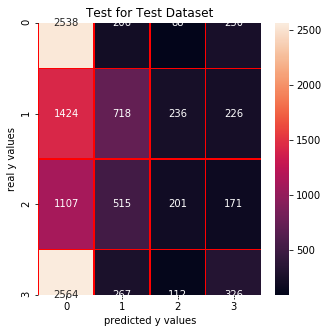

In [26]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

### Visualizing the Training Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, '')

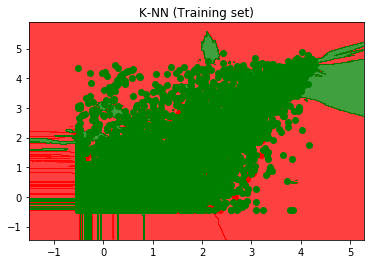

In [27]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Training set)')
plt.xlabel('')
plt.ylabel('')


### Visualizing the Test Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

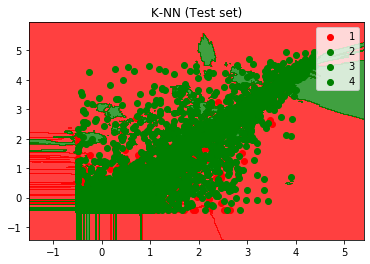

In [28]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### model accuracy

In [29]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.34551100557128506
